# TASK-2 [Experimentation and uplift testing]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
df.shape

(264834, 12)

In [4]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month



In [5]:
df['MONTH'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG',
                                                  'SEPT','OCT','NOV','DEC'],inplace=True)
df.head()


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,OCT
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,SEPT
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,MAR
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,MAR
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,NOV


In [6]:
df.BRAND.value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [7]:
x=df['STORE_NBR'].unique()
x


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# TRIAL STORES [77,86,88]

In [8]:
trial_stores=df[df.STORE_NBR.isin([77,86,88])]
trial_stores.head()



,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,MAR
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,APR
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,SEPT
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,FEB
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,JAN


In [9]:
# confirm Date Periods
print(min(trial_stores.DATE),max(trial_stores.DATE))

2018-07-01 2019-06-30


## Total Revenue From Trial Stores

In [10]:
SALES=trial_stores['TOT_SALES']
SALES.sum()

30008.600000000002

In [11]:
Sales_per_store=trial_stores.groupby('STORE_NBR').sum()
Sales_per_store

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
STORE_NBR,,,,,,
77,88553065,45560607,32362,872,3040.00,100649
86,134669027,132834079,86923,3066,10635.35,272831
88,190439625,167279872,100234,3718,16333.25,343413


In [12]:
###Total Customers,Product Quantity Counts & Total sales Per store, 
p = Sales_per_store.reindex(columns=['PROD_QTY','TOT_SALES'])

p



,PROD_QTY,TOT_SALES
STORE_NBR,,
77,872,3040.00
86,3066,10635.35
88,3718,16333.25


In [13]:
Customers_count=trial_stores.groupby('STORE_NBR').count()
ct = Customers_count.reindex(columns=['LYLTY_CARD_NBR'])
ct.rename(columns={'LYLTY_CARD_NBR':'CUSTOMER_TOTAL'},inplace=True)

ct



,CUSTOMER_TOTAL
STORE_NBR,
77,563
86,1538
88,1873


## CONTROL STORES [211,226]

In [14]:
Store_sales=df.groupby('STORE_NBR').sum()
x =Store_sales .reindex(columns=['PROD_QTY','TOT_SALES'])
#print(min(x.TOT_SALES),max(x.TOT_SALES))
x.sort_values(by=['TOT_SALES'])

##From this Select the Stores Having Minimum and Maximum Total Sales (Store 211 and 226) as our Control Stores

,PROD_QTY,TOT_SALES
STORE_NBR,,
211,2,5.20
76,2,6.00
11,2,6.70
252,2,7.40
206,2,7.60
...,...,...
237,3515,15539.50
40,3499,15559.50
165,3602,15973.75


In [15]:
control_stores=df[df.STORE_NBR.isin([211,226])]

control_stores



,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
206258,211310,2019-04-11,211,210515,41,Doritos Salsa Mild 300g,1,2.6,300,DORITOS,NEW FAMILIES,Budget,APR
206259,211332,2018-07-16,211,210516,101,Doritos Salsa Medium 300g,1,2.6,300,DORITOS,OLDER FAMILIES,Budget,JUL
221625,226002,2018-10-14,226,226213,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,SMITHS,OLDER SINGLES/COUPLES,Budget,OCT
221626,226002,2018-12-03,226,226214,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,OLDER SINGLES/COUPLES,Budget,DEC
221627,226002,2019-01-20,226,226215,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,COBS,OLDER SINGLES/COUPLES,Budget,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223640,226383,2018-08-14,226,228280,17,Kettle Sensations BBQ&Maple 150g,1,4.6,150,KETTLE,OLDER SINGLES/COUPLES,Premium,AUG
223641,226383,2018-07-07,226,228278,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,JUL
223642,226383,2018-07-13,226,228279,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Premium,JUL
223643,226383,2019-02-11,226,228281,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,KETTLE,OLDER SINGLES/COUPLES,Premium,FEB


In [16]:
#Confirm date periods
print(min(control_stores.DATE),max(control_stores.DATE))

2018-07-01 2019-06-30


## Total Revenues From Control Stores

In [17]:
Sales_per_store1=control_stores.groupby('STORE_NBR').sum()
c = Sales_per_store1.reindex(columns=['PROD_QTY','TOT_SALES'])
c

,PROD_QTY,TOT_SALES
STORE_NBR,,
211,2,5.20
226,4001,17605.45


In [18]:
Customers_count1=control_stores.groupby('STORE_NBR').count()
cc = Customers_count1.reindex(columns=['LYLTY_CARD_NBR'])
cc.rename(columns={'LYLTY_CARD_NBR':'CUSTOMER_TOTAL'},inplace=True)
cc

,CUSTOMER_TOTAL
STORE_NBR,
211,2
226,2020


## Correlation between LYLTY_CARD_NBR, PROD_QTY, TOT_SALES in trial Stores

In [19]:
y=trial_stores[['LYLTY_CARD_NBR','PROD_QTY','TOT_SALES','STORE_NBR']]


In [20]:
corr=y.corr()
corr

,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES,STORE_NBR
LYLTY_CARD_NBR,1.000000,-0.059109,-0.012466,-0.096868
PROD_QTY,-0.059109,1.000000,0.514922,0.454343
TOT_SALES,-0.012466,0.514922,1.000000,0.433255
STORE_NBR,-0.096868,0.454343,0.433255,1.000000


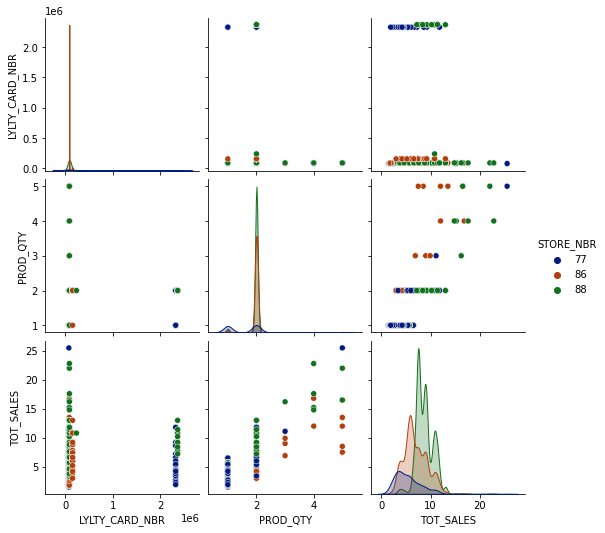

In [21]:

sns.pairplot(y,hue='STORE_NBR',palette='dark')

<AxesSubplot:>

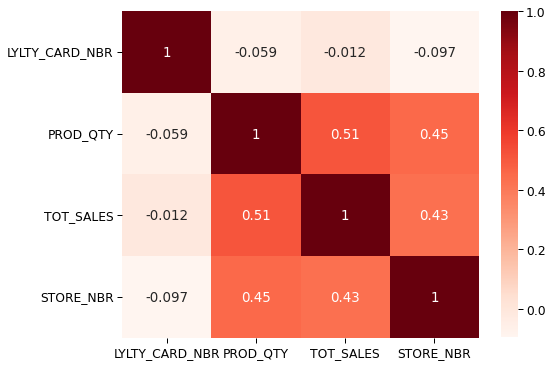

In [22]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
y_mtx=y.corr()

sns.heatmap(y_mtx,annot=True,cmap='Reds')

## Correlation between LYLTY_CARD_NBR, PROD_QTY, TOT_SALES in Control Stores

<AxesSubplot:>

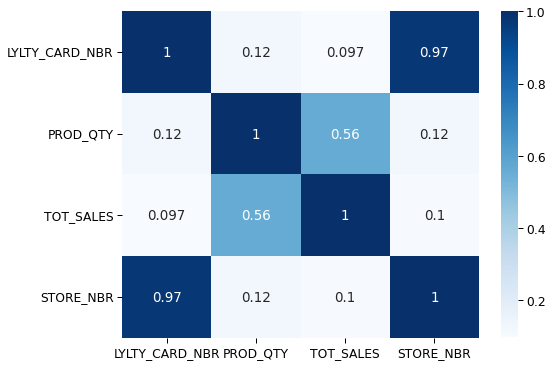

In [23]:
h=control_stores[['LYLTY_CARD_NBR','PROD_QTY','TOT_SALES','STORE_NBR']]
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
h_mtx=h.corr()

sns.heatmap(h_mtx,annot=True,cmap='Blues')

In [24]:
corr_h=h.corr()
corr_h

,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES,STORE_NBR
LYLTY_CARD_NBR,1.000000,0.122765,0.096710,0.973462
PROD_QTY,0.122765,1.000000,0.561116,0.122445
TOT_SALES,0.096710,0.561116,1.000000,0.102769
STORE_NBR,0.973462,0.122445,0.102769,1.000000


## Brand Distribution Across the Trial Stores

Text(0.5, 1.0, 'Brand Distribution Across the 77, 86, 88 Stores')

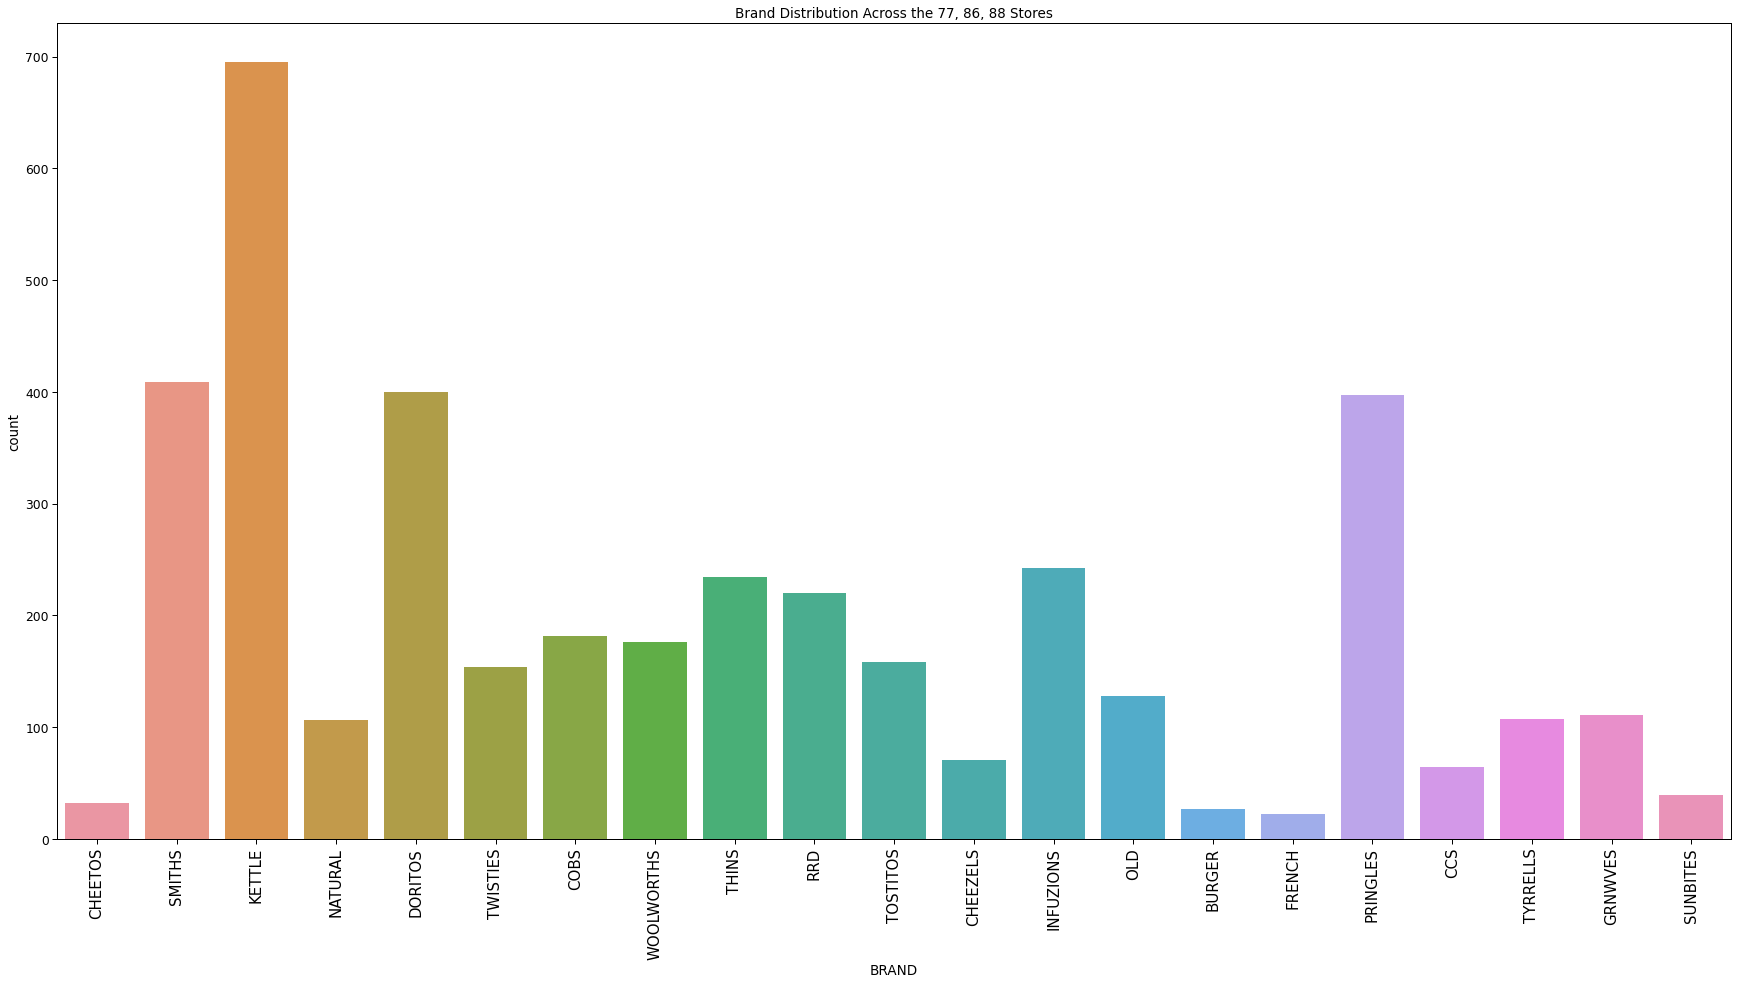

In [25]:
plt.figure(figsize=(30,15))
sns.countplot(x='BRAND',data=trial_stores)
plt.xticks(rotation="vertical",size=15)
plt.title('Brand Distribution Across the 77, 86, 88 Stores')


## Brand Distribution Across the Control Stores

Text(0.5, 1.0, 'Brand Distribution Across the control Stores')

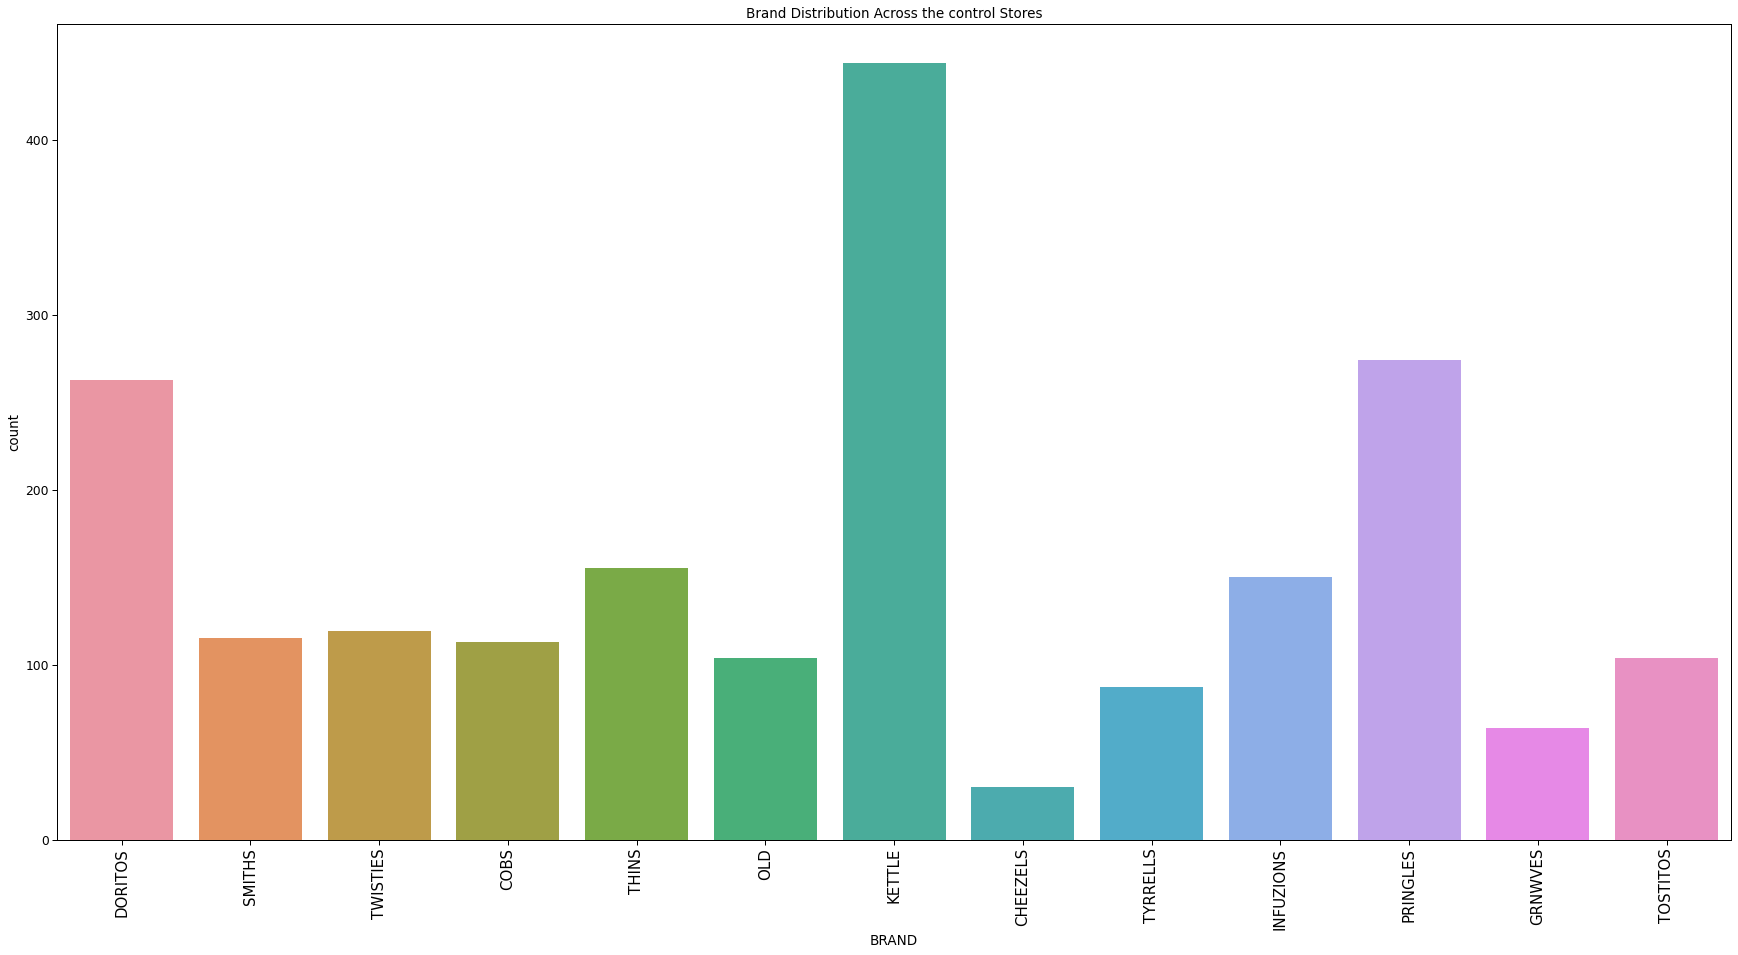

In [26]:
plt.figure(figsize=(30,15))
sns.countplot(x='BRAND',data=control_stores)
plt.xticks(rotation="vertical",size=15)
plt.title('Brand Distribution Across the control Stores')


In [27]:
control_stores.STORE_NBR.value_counts()

226    2020
211       2
Name: STORE_NBR, dtype: int64

## Total Transactions Per Store Number for the Trial stores

Text(0.5, 1.0, 'Total Transactions Per Store Number')

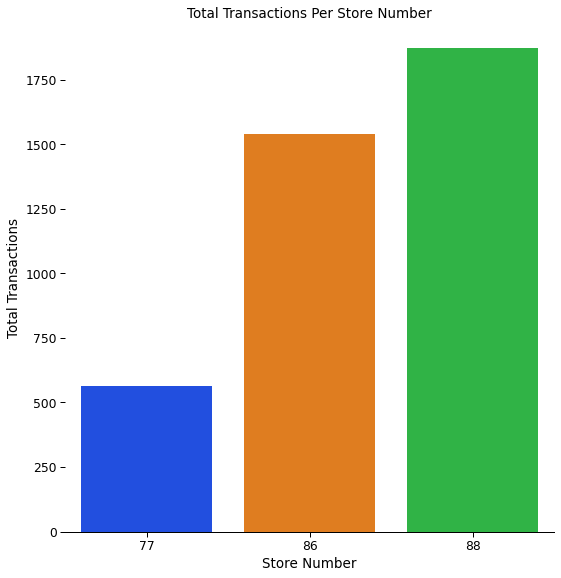

In [28]:
total_transactions=trial_stores.STORE_NBR.value_counts().reset_index(name="STORE_NBR")
g=sns.catplot(x='index',y="STORE_NBR",data=total_transactions,height=8,kind='bar',palette='bright')
g.despine(left=True)
g.set_xlabels("Store Number")
g.set_ylabels("Total Transactions")
plt.title('Total Transactions Per Store Number')


## Total Transactions Per Store Number for the Control stores

Text(0.5, 1.0, 'Total Transactions Per Store Number')

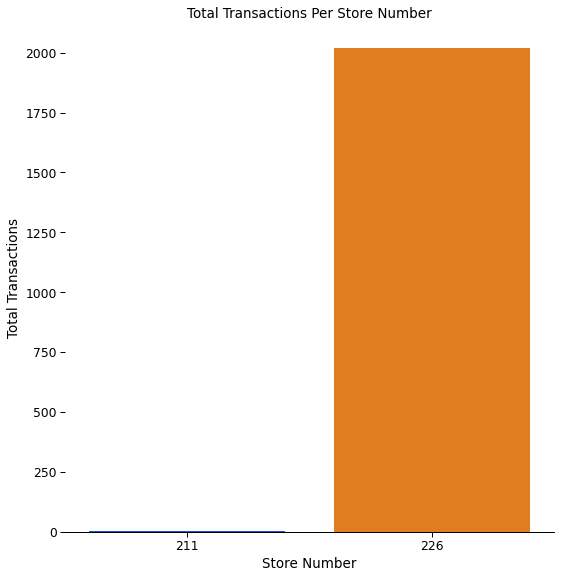

In [29]:
total_transactions=control_stores.STORE_NBR.value_counts().reset_index(name="STORE_NBR")
g=sns.catplot(x='index',y="STORE_NBR",data=total_transactions,height=8,kind='bar',palette='bright')
g.despine(left=True)
g.set_xlabels("Store Number")
g.set_ylabels("Total Transactions")
plt.title('Total Transactions Per Store Number')



## TOTAL MONTHLY SALES FOR TRIAL STORES

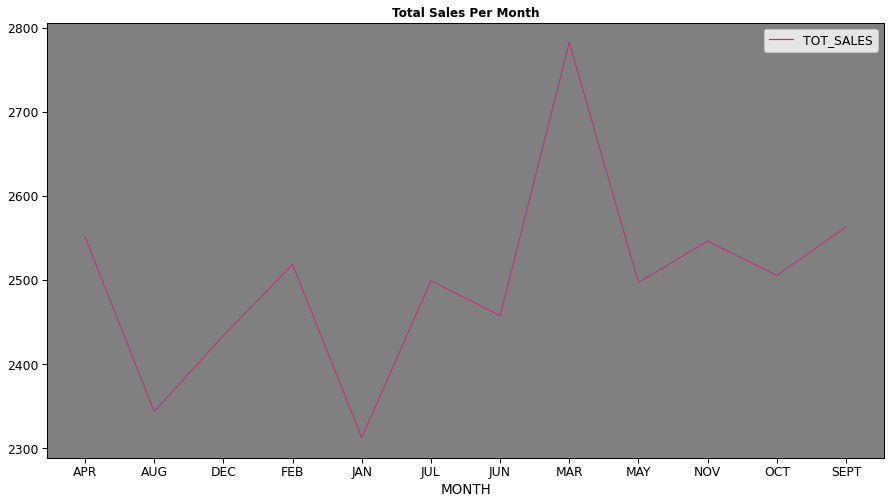

In [30]:
plt.figure(figsize=(15,8))

monthly_sales=trial_stores.groupby(["MONTH"])["TOT_SALES"].sum().reset_index()
p=monthly_sales.set_index("MONTH")
ax=plt.axes()
ax.set(facecolor="grey")
sns.lineplot(data=p,palette="magma")
plt.title("Total Sales Per Month",fontsize=12, fontweight="bold")
plt.show()

## TOTAL MONTHLY SALES FOR CONTROL STORES

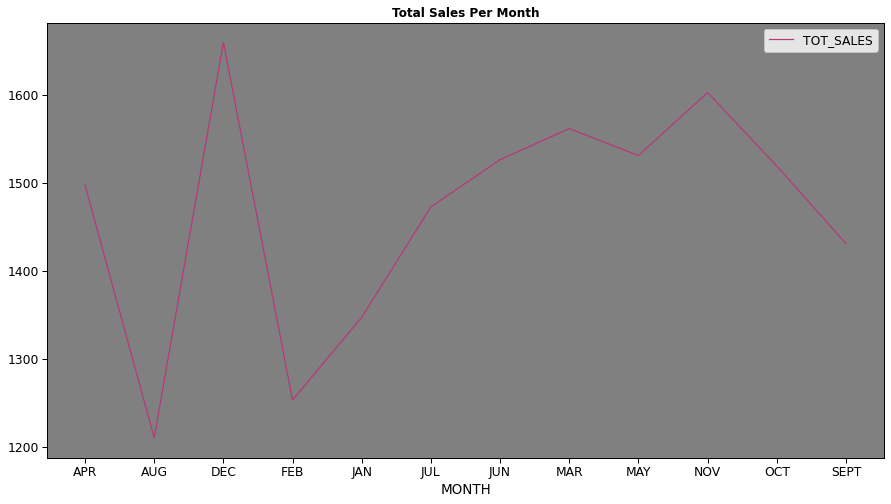

In [31]:
plt.figure(figsize=(15,8))

monthly_sales=control_stores.groupby(["MONTH"])["TOT_SALES"].sum().reset_index()
p=monthly_sales.set_index("MONTH")
ax=plt.axes()
ax.set(facecolor="grey")
sns.lineplot(data=p,palette="magma")
plt.title("Total Sales Per Month",fontsize=12, fontweight="bold")
plt.show()

## Total Monthly Customer Count For The Trial Stores

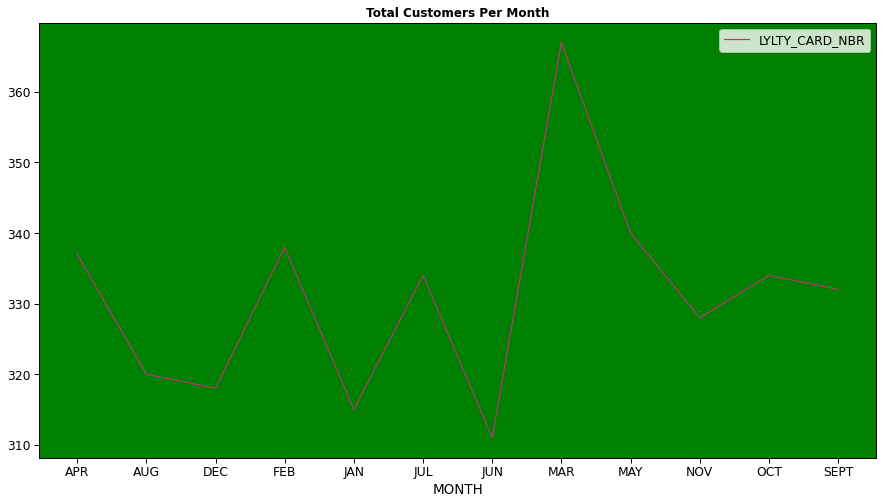

In [32]:
plt.figure(figsize=(15,8))

monthly_sales=trial_stores.groupby(["MONTH"])["LYLTY_CARD_NBR"].count().reset_index()
p=monthly_sales.set_index("MONTH")
ax=plt.axes()
ax.set(facecolor="green")
sns.lineplot(data=p,palette="magma")
plt.title("Total Customers Per Month",fontsize=12, fontweight="bold")
plt.show()

## Total Monthly Customer Count For The Control Stores

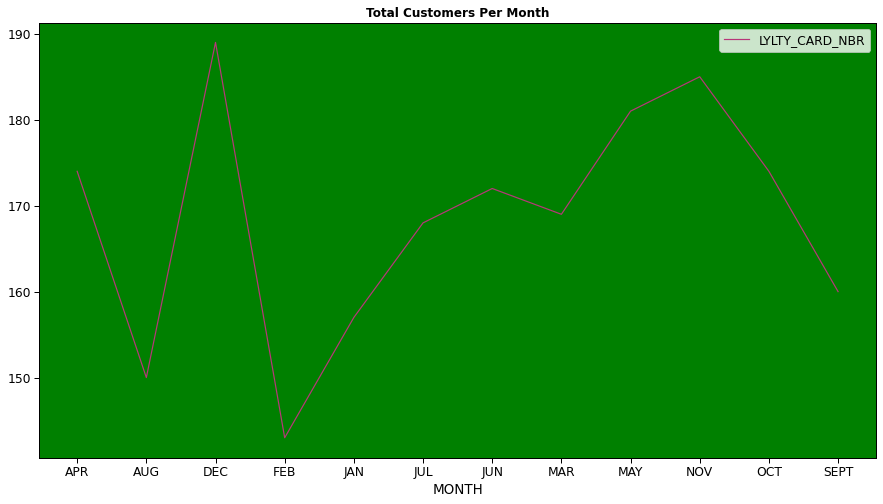

In [33]:
plt.figure(figsize=(15,8))

monthly_sales=control_stores.groupby(["MONTH"])["LYLTY_CARD_NBR"].count().reset_index()
p=monthly_sales.set_index("MONTH")
ax=plt.axes()
ax.set(facecolor="green")
sns.lineplot(data=p,palette="magma")
plt.title("Total Customers Per Month",fontsize=12, fontweight="bold")
plt.show()

## STOREWISE MONTHLY TRANSACTIONS ACROSS THE TRIAL STORES 

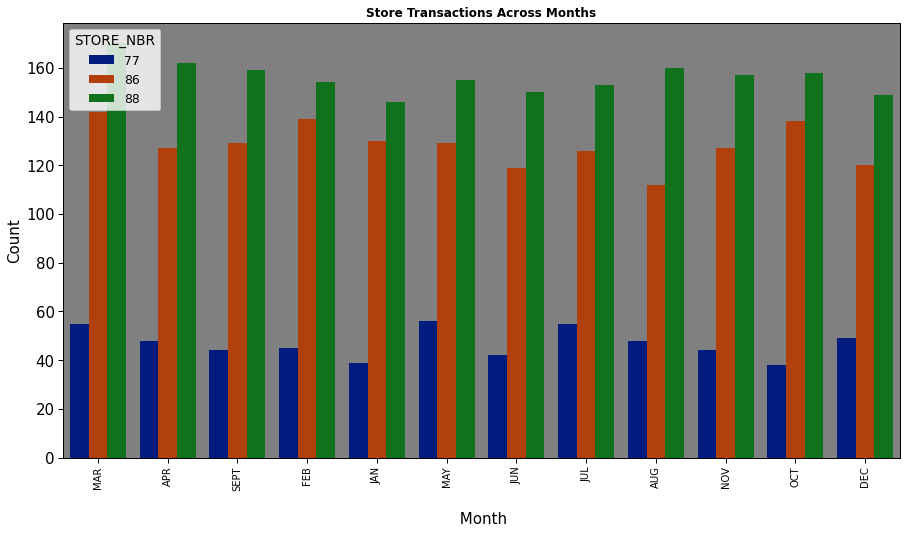

In [34]:
plt.figure(figsize=(15,8))
ax=plt.axes()
ax.set(facecolor="grey")
sns.countplot(x="MONTH",hue="STORE_NBR",data=trial_stores,palette="dark",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("\n Month",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Store Transactions Across Months",fontsize=12, fontweight="bold")
plt.show()

## STOREWISE MONTHLY TRANSACTIONS ACROSS THE CONTROL STORES 

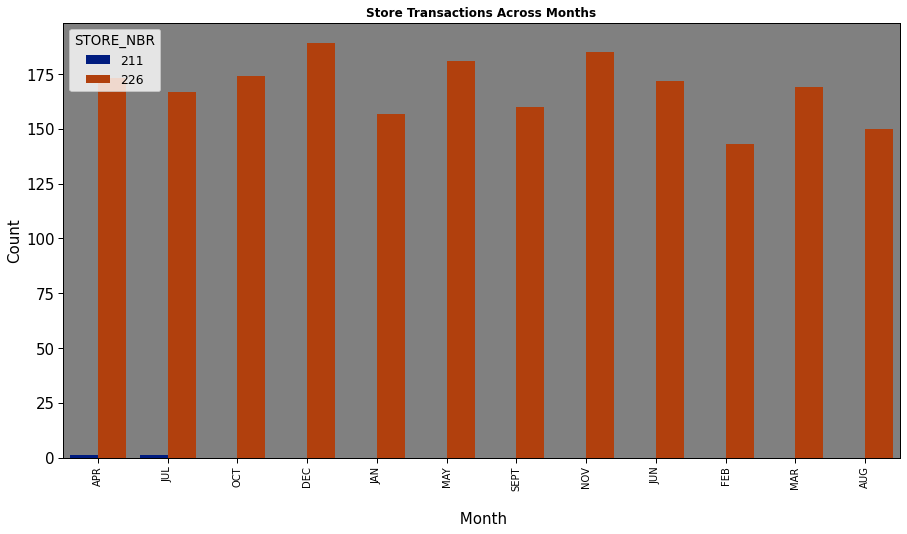

In [35]:
plt.figure(figsize=(15,8))
ax=plt.axes()
ax.set(facecolor="grey")
sns.countplot(x="MONTH",hue="STORE_NBR",data=control_stores,palette="dark",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("\n Month",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Store Transactions Across Months",fontsize=12, fontweight="bold")
plt.show()

## Number of Times Similar Customer Made A Transaction in Trial Stores

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Purchases By Single LYLTY_CARD_NBR ')

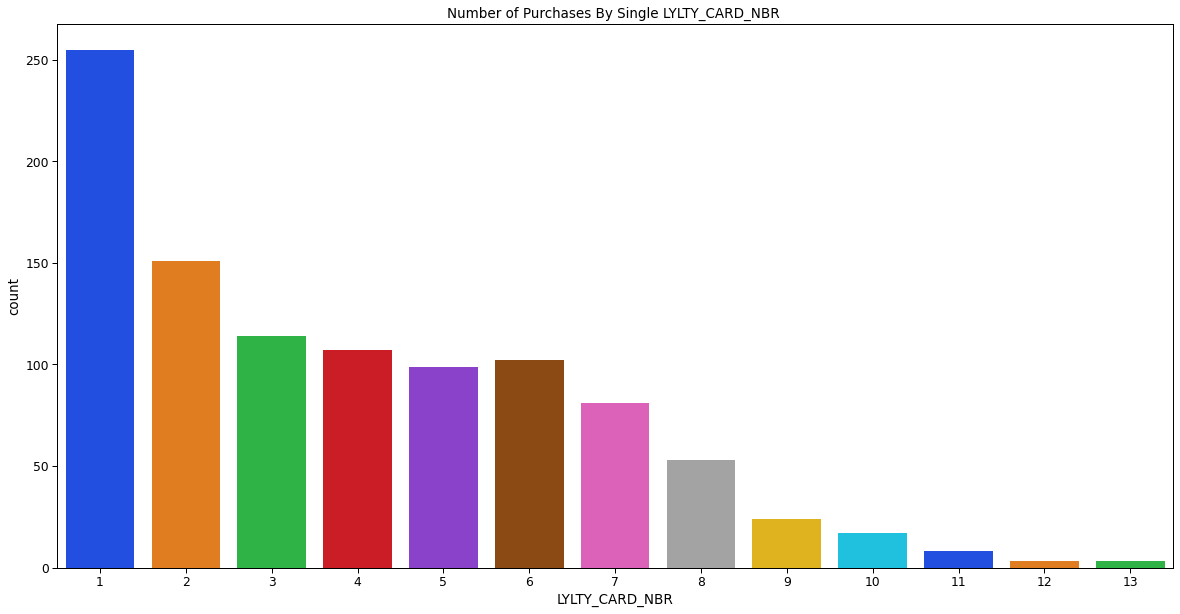

In [36]:
Multi_Purchases=trial_stores.LYLTY_CARD_NBR.value_counts()
plt.figure(figsize=(20,10))
sns.countplot(Multi_Purchases,palette="bright")
plt.title('Number of Purchases By Single LYLTY_CARD_NBR ')


## Number of Times Similar Customer Made A Transaction in Control Stores

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Purchases By Single LYLTY_CARD_NBR ')

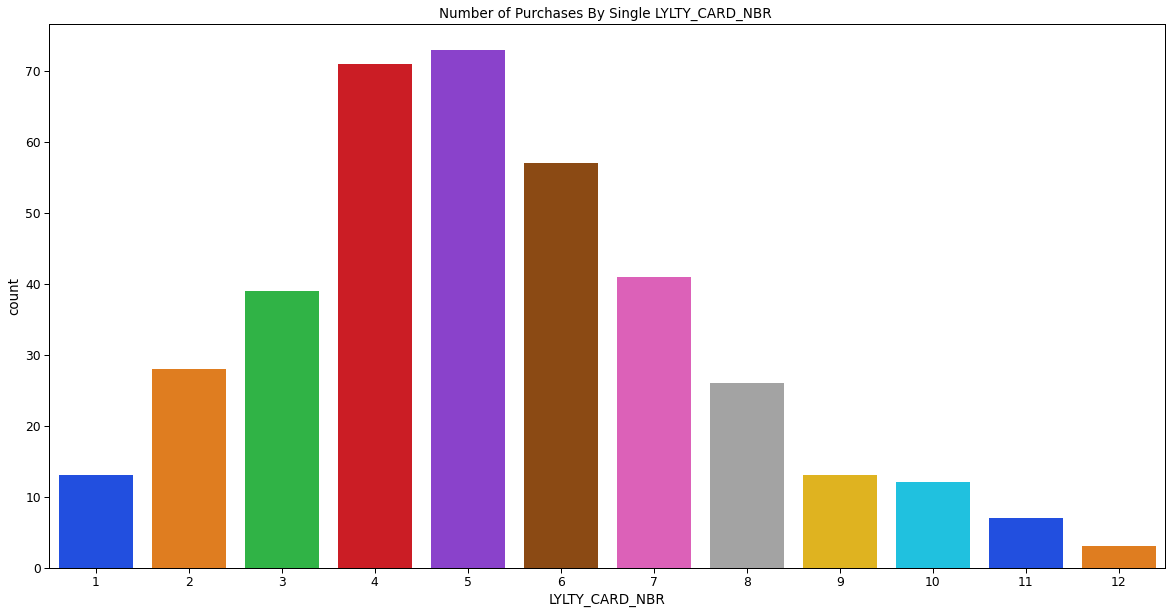

In [37]:
Multi_Purchases=control_stores.LYLTY_CARD_NBR.value_counts()
plt.figure(figsize=(20,10))
sns.countplot(Multi_Purchases,palette="bright")
plt.title('Number of Purchases By Single LYLTY_CARD_NBR ')
